### 1. Python Project: Employee Performance Analysis
Objective: Use Python for exploratory data analysis (EDA) to uncover insights into employee performance, salary distribution, department trends, and workforce demographics.

Steps:

✅ Data Cleaning:

.Handle missing values in the Performance Score column.

.Convert Joining Date to a proper datetime format.


✅ Exploratory Data Analysis (EDA):

.Salary Trends: Compare salaries across departments and locations.

.Performance Distribution: Analyze how performance scores vary by experience, department, and session.

.Experience & Performance Relationship: Identify whether higher experience leads to better performance.

.Employee Retention: Analyze active vs. inactive employees based on salary, experience, and department.

.Gender & Session Analysis: Identify patterns in work sessions across genders.

✅ Visualization with Matplotlib:

.Bar charts for the salaries of each Department.

.Box plots to identify salary variations across locations.


.Pie charts for employee distribution across different statuses.

This project will give deep insights into workforce trends and performance factors. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv("Employe_Performance_dataset.csv")
df.head()

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [3]:
#Data Cleaning
SumMissingvalue = df.isnull().sum()
print(SumMissingvalue)

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64


In [14]:
#filling the null values with the mean
mean_value = round(df["Performance Score"].mean(),1)
print(mean_value)
df.fillna(mean_value, inplace = True)
df.head(20)

2.9


,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,2.9,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening
5,6,Ashley Howe,29,Female,HR,2591,2016-06-24,1.0,6,Active,Chicago,Evening
6,7,David Olson,39,Female,Sales,6826,2023-05-11,2.9,4,Active,New York,Night
7,8,Amanda Baker,52,Other,HR,6285,2015-04-01,2.9,8,Inactive,Chicago,Evening
8,9,Jeremy Wright,63,Female,Sales,9862,2024-02-07,2.9,3,Inactive,New York,Night
9,10,Brian Faulkner,30,Male,IT,8202,2018-05-26,1.0,9,Active,Los Angeles,Morning


In [19]:
#coverting Joindate column to datetime datatype
df['Joining Date'] = pd.to_datetime(df['Joining Date'])
df['Joining Date']

0     2015-05-03
1     2020-11-09
2     2019-02-12
3     2017-09-08
4     2020-02-15
         ...    
995   2024-06-23
996   2018-07-20
997   2023-07-05
998   2022-02-18
999   2022-07-31
Name: Joining Date, Length: 1000, dtype: datetime64[ns]

In [21]:
#checking the datatype
df["Joining Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Joining Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


### Exploratory Data Analysis (EDA)

In [55]:
#Salary Trends: Comparing salaries across departments and locations.
Sal_trend = df.groupby(["Department", "Location"])["Salary"].describe()
Sal_trend

count         mean          std     min      25%  \
Department Location                                                        
HR         Chicago      120.0  5831.625000  2373.725703  2041.0  3504.00   
           Los Angeles  103.0  6196.174757  2116.586442  2077.0  4318.50   
           New York     100.0  5943.130000  2225.654350  2149.0  3776.50   
IT         Chicago       98.0  5994.459184  2348.238432  2061.0  3930.50   
           Los Angeles  120.0  6070.641667  2378.890935  2029.0  3925.25   
           New York     121.0  5845.818182  2313.581909  2016.0  3979.00   
Sales      Chicago      115.0  5463.600000  2164.737133  2015.0  3824.50   
           Los Angeles  112.0  5762.392857  2336.721178  2087.0  3618.75   
           New York     111.0  6198.918919  2383.819388  2025.0  3868.50   

                           50%      75%     max  
Department Location                              
HR         Chicago      5858.0  7606.50  9993.0  
           Los Angeles  6648.0  7766.00  9838.0  
           New York     6132.5  7816.75  9973.0  
IT         Chicago      5774.5  8144.25  9988.0  
           Los Angeles  5871.5  8210.50  9946.0  
           New York     5746.0  7885.00  9921.0  
Sales      Chicago      5086.0  7190.50  9926.0  
           Los Angeles  5399.5  7788.75  9963.0  
           New York     6754.0  8229.00  9862.0

In [53]:
#Performance Distribution: Analyzing how performance scores vary by experience, department, and session.
Performance = df.groupby(["Experience","Department","Session"])["Performance Score"].describe()
Performance

count      mean       std  min    25%   50%  \
Experience Department Session                                                
1          HR         Evening    3.0  2.600000  0.519615  2.0  2.450  2.90   
                      Morning    6.0  2.783333  0.974508  1.0  2.900  2.90   
                      Night      6.0  3.116667  0.994820  2.0  2.900  2.90   
           IT         Evening    6.0  2.466667  0.814043  1.0  2.225  2.90   
                      Morning   10.0  2.660000  1.047961  1.0  2.225  2.90   
...                              ...       ...       ...  ...    ...   ...   
20         IT         Morning    5.0  2.360000  0.861974  1.0  2.000  2.90   
                      Night      2.0  2.900000  0.000000  2.9  2.900  2.90   
           Sales      Evening    6.0  2.283333  0.767898  1.0  2.000  2.45   
                      Morning    6.0  3.283333  1.519759  1.0  2.900  2.90   
                      Night      5.0  2.980000  1.225561  1.0  2.900  3.00   

                                 75%  max  
Experience Department Session              
1          HR         Evening  2.900  2.9  
                      Morning  2.975  4.0  
                      Night    2.975  5.0  
           IT         Evening  2.975  3.0  
                      Morning  2.975  4.0  
...                              ...  ...  
20         IT         Morning  2.900  3.0  
                      Night    2.900  2.9  
           Sales      Evening  2.900  2.9  
                      Morning  4.475  5.0  
                      Night    4.000  4.0  

[180 rows x 8 columns]

In [52]:
#Experience & Performance Relationship: Identifying whether higher experience leads to better performance.
df.groupby("Experience")["Performance Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Experience,,,,,,,,
1,58.0,2.827586,0.951231,1.0,2.900,2.9,2.900,5.0
2,45.0,3.068889,0.916719,1.0,2.900,2.9,3.000,5.0
3,52.0,2.836538,1.127730,1.0,2.900,2.9,3.000,5.0
4,58.0,2.712069,1.021364,1.0,2.000,2.9,2.900,5.0
5,44.0,3.218182,0.990014,1.0,2.900,2.9,4.000,5.0
6,52.0,2.942308,1.146409,1.0,2.000,2.9,4.000,5.0
7,64.0,3.079687,0.958534,1.0,2.900,2.9,3.000,5.0
8,61.0,2.881967,1.076028,1.0,2.900,2.9,2.900,5.0
9,57.0,2.789474,1.041751,1.0,2.900,2.9,2.900,5.0


In [64]:
#Employee Retention: Analyzing active vs. inactive employees based on salary, experience, and department.
employee_retention = df.groupby(["Department","Status","Experience"])["Salary"].describe()
employee_retention

count         mean          std     min  \
Department Status   Experience                                            
HR         Active   1             9.0  6396.777778  2504.453971  2776.0   
                    2             9.0  6254.666667  2039.200946  2959.0   
                    3             7.0  5618.428571  2171.619891  3433.0   
                    4             6.0  6426.500000  2917.008313  2477.0   
                    5             4.0  6471.000000  1584.742461  5309.0   
...                               ...          ...          ...     ...   
Sales      Inactive 16            7.0  7150.285714  1794.385291  4664.0   
                    17            6.0  5014.833333  3617.311677  2330.0   
                    18            8.0  5128.625000  2785.357014  2303.0   
                    19            4.0  6591.750000  2223.040767  4424.0   
                    20           13.0  6516.846154  2457.217188  3414.0   

                                    25%     50%      75%     max  
Department Status   Experience                                    
HR         Active   1           4213.00  7187.0  7928.00  9402.0  
                    2           4713.00  7375.0  7485.00  8255.0  
                    3           3582.50  5386.0  7535.50  8274.0  
                    4           4139.00  7868.5  8148.75  9207.0  
                    5           5458.25  5908.5  6921.25  8758.0  
...                                 ...     ...      ...     ...  
Sales      Inactive 16          5872.50  7727.0  8253.50  9409.0  
                    17          2683.75  2879.5  7986.25  9693.0  
                    18          3315.00  3700.5  7233.50  9323.0  
                    19          5398.25  6145.0  7338.50  9653.0  
                    20          4496.00  6621.0  8608.00  9963.0  

[120 rows x 8 columns]

In [69]:
#Gender & Session Analysis: Identify patterns in work sessions across genders.
GenSes = df.groupby(["Gender","Session"])["Performance Score"].describe()
GenSes

count      mean       std  min   25%  50%    75%  max
Gender Session                                                       
Female Evening  110.0  3.050000  1.037264  1.0  2.90  2.9  3.000  5.0
       Morning  103.0  3.161165  0.979519  1.0  2.90  2.9  3.500  5.0
       Night    119.0  2.829412  1.081693  1.0  2.45  2.9  3.000  5.0
Male   Evening  102.0  2.847059  0.944888  1.0  2.90  2.9  2.900  5.0
       Morning  115.0  2.747826  0.992458  1.0  2.00  2.9  2.900  5.0
       Night    111.0  2.912613  1.106273  1.0  2.45  2.9  3.000  5.0
Other  Evening  114.0  2.910526  0.870903  1.0  2.90  2.9  2.900  5.0
       Morning  116.0  2.838793  1.065488  1.0  2.00  2.9  2.925  5.0
       Night    110.0  2.878182  0.942900  1.0  2.90  2.9  3.000  5.0

In [92]:
#performance percentage comparision for each department
def PerformancePercentage():
    x = df.groupby(["Department"])["Performance Score"].sum() / df["Performance Score"].sum() * 100
    return x
PerformancePercentage()

Department
HR       31.990913
IT       34.269586
Sales    33.739502
Name: Performance Score, dtype: float64

### Visualization with Matplotlib

Department
HR       1932314
IT       2023278
Sales    1961782
Name: Salary, dtype: int64


<Axes: title={'center': 'Salaries Of Each Department'}, xlabel='Department', ylabel='Total Salaries(In Millions)'>

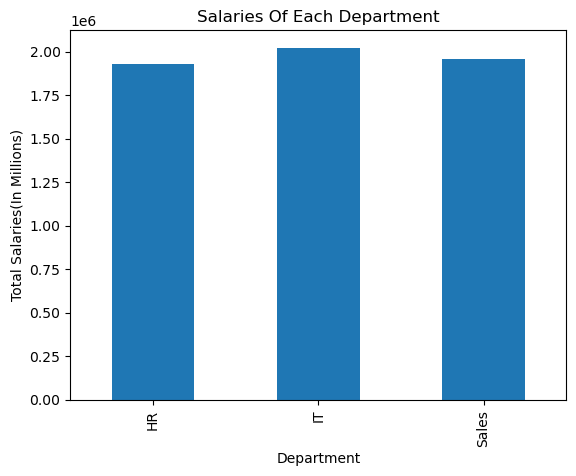

In [108]:
#Bar charts for the salaries of each Department.
DepartmentSalaries = df.groupby(["Department"])["Salary"].sum()
print(DepartmentSalaries)
DepartmentSalaries.plot(kind = 'bar',xlabel="Department",ylabel="Total Salaries(In Millions)", 
                        title ="Salaries Of Each Department")



<Axes: title={'center': 'Salary'}, xlabel='Location'>

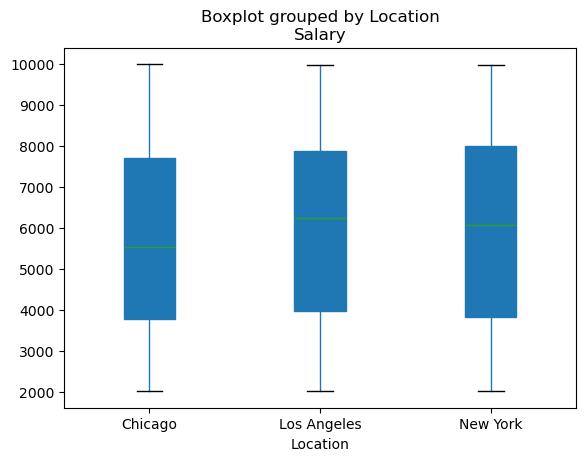

In [137]:
#Box plots to identify salary variations across locations.
df.boxplot(column="Salary", by="Location", grid=False, patch_artist=True)

In [140]:
print(df.groupby("Location")["Salary"].max())
print(df.groupby("Location")["Salary"].min())

print(df.groupby("Location")["Salary"].median())

Location
Chicago        9993
Los Angeles    9963
New York       9973
Name: Salary, dtype: int64
Location
Chicago        2015
Los Angeles    2029
New York       2016
Name: Salary, dtype: int64
Location
Chicago        5531.0
Los Angeles    6233.0
New York       6066.0
Name: Salary, dtype: float64


([<matplotlib.patches.Wedge at 0x1fd14aa58b0>,
 [Text(-0.003455701743252077, 1.099994571861817, 'Active'),
  Text(0.003455701743251942, -1.099994571861817, 'Inactive')],
 [Text(-0.0018849282235920417, 0.5999970391973546, '50.1%'),
  Text(0.0018849282235919682, -0.5999970391973546, '49.9%')])

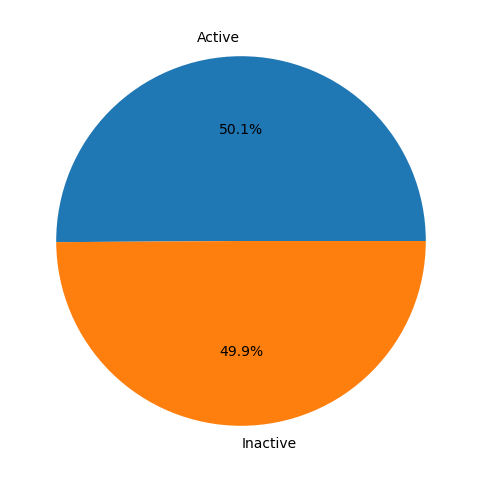

In [147]:
#Pie charts for employee distribution across different statuses.
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts,labels=status_counts.index, autopct=lambda p: f'{p:.1f}%')